In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
housing = pd.DataFrame(pd.read_csv("Housing.csv"))

In [3]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
housing.info()
#no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
#change yes and no to a numerical value
cat =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def change(x):
    return x.map({'yes': 1, "no": 0})

housing[cat] = housing[cat].apply(change)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [6]:
#change furnishingstatus to dummy variables
funish_dummy = pd.get_dummies(housing['furnishingstatus'], prefix='status')

housing = pd.concat([housing, funish_dummy], axis=1)

housing = housing.drop('furnishingstatus', axis=1)

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,status_furnished,status_semi-furnished,status_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   price                  545 non-null    int64
 1   area                   545 non-null    int64
 2   bedrooms               545 non-null    int64
 3   bathrooms              545 non-null    int64
 4   stories                545 non-null    int64
 5   mainroad               545 non-null    int64
 6   guestroom              545 non-null    int64
 7   basement               545 non-null    int64
 8   hotwaterheating        545 non-null    int64
 9   airconditioning        545 non-null    int64
 10  parking                545 non-null    int64
 11  prefarea               545 non-null    int64
 12  status_furnished       545 non-null    uint8
 13  status_semi-furnished  545 non-null    uint8
 14  status_unfurnished     545 non-null    uint8
dtypes: int64(12), uint8(3)
memory usage: 52.

In [8]:
import statsmodels.api as sm

X = sm.add_constant(housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
                             'hotwaterheating','airconditioning', 'parking', 'prefarea', 'status_furnished',
                             'status_semi-furnished', 'status_unfurnished']])
y = housing['price']

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Print the summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Sun, 03 Dec 2023   Prob (F-statistic):          9.07e-123
Time:                        20:45:39   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -8.232e+

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

np.random.seed(100)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [10]:
scaler = MinMaxScaler()
# scale all the variables except for the yes and no and the dummy
num_vars = ['area']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

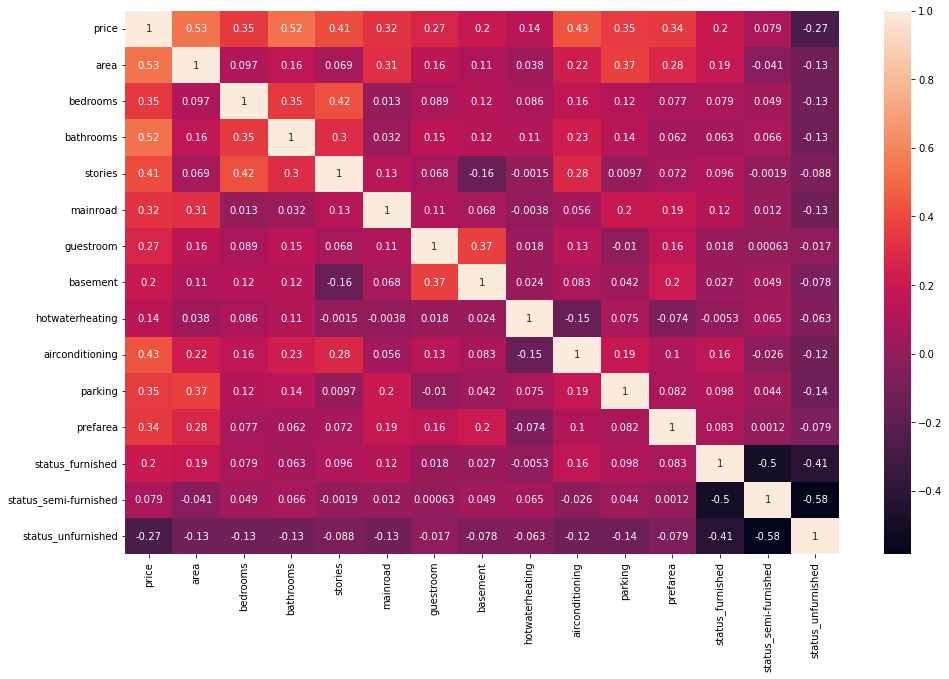

In [11]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(),annot = True,)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X = housing[housing.columns[1:]] 
X = housing.drop(['price'], axis = 1)
X_scaled = ss.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)

y = housing['price']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size = 0.2, random_state = 42)

In [14]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (436, 14)
y_train (436,)
X_test (109, 14)
y_test (109,)


In [15]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

lr = linear_model.LinearRegression()
cv = cross_val_score(lr,X_train,y_train,cv = 5)
print(cv)
print(cv.mean())

[0.69856012 0.68386251 0.60963463 0.61909486 0.62404878]
0.6470401792343206


In [16]:
lr.fit(X_train, y_train)

# Predict target variable on the test data
lr_y_pred = lr.predict(X_test)

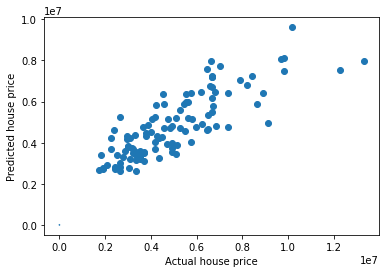

In [17]:
# Plot predicted values against actual values
plt.scatter(y_test, lr_y_pred)
plt.plot([0, 200], [0, 200])
plt.xlabel('Actual house price')
plt.ylabel('Predicted house price')

plt.savefig('linear_regression_plot.pdf', format='pdf')

plt.show()

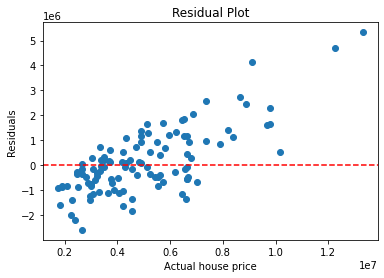

In [18]:
import matplotlib.pyplot as plt

# Assuming lr_y_pred and y_test are your predicted and actual values

# Calculate residuals
residuals = y_test - lr_y_pred

# Plot residuals
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0 for reference
plt.xlabel('Actual house price')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.savefig('residual_plot.pdf', format='pdf')

plt.show()

In [19]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 4)
cv = cross_val_score(knn,X_train,y_train,cv = 5)
print(cv)
print(cv.mean())

[0.6137551  0.3926914  0.57974661 0.60567757 0.57291027]
0.5529561910399419


In [20]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv = 5)
print(cv)
print(cv.mean())

[0.5553917  0.65499544 0.58054182 0.57628653 0.54490041]
0.5824231816603769


In [21]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print("Linear Regression:")
print("R^2:", metrics.r2_score(y_test,lr_y_pred))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,lr_y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test,lr_y_pred))
print("Root Mean Squared Error:",np.square(metrics.mean_squared_error(y_test,lr_y_pred)))

Linear Regression:
R^2: 0.6529242642153177
Mean Absolute Error: 970043.4039201641
Mean Squared Error: 1754318687330.6677
Root Mean Squared Error: 3.077634056717597e+24


In [22]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

X=housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'status_furnished', 'status_semi-furnished', 'status_unfurnished']]
model = LinearRegression()
#transforming target variable through quantile transformer
ttr = TransformedTargetRegressor(regressor=model, transformer=QuantileTransformer(output_distribution='normal'))
ttr.fit(X_train, y_train)
yhat = ttr.predict(X_test)
r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))

C:\Users\garri\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (436). n_quantiles is set to n_samples.
  warnings.warn(


(0.6530068501919313, 988609.4933504052, 1324349.3688262587)

In [27]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Assuming 'housing' is your dataframe and 'target_variable' is your target variable
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'status_furnished', 'status_semi-furnished', 'status_unfurnished']]
y = housing['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the TransformedTargetRegressor with QuantileTransformer and LinearRegression
model = LinearRegression()
ttr = TransformedTargetRegressor(regressor=model, transformer=QuantileTransformer(output_distribution='normal'))

# Fit the model
ttr.fit(X_train, y_train)

# Predict on the test set
yhat = ttr.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, yhat)
mae = mean_absolute_error(y_test, yhat)
rmse = np.sqrt(mean_squared_error(y_test, yhat))

print(f'R2 Score: {r2:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')

R2 Score: 0.6530
Mean Absolute Error: 988609.4934
Root Mean Squared Error: 1324349.3688


C:\Users\garri\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (436). n_quantiles is set to n_samples.
  warnings.warn(


In [37]:
plt.scatter(y_test, yhat)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.savefig('linearity_check.pdf')
plt.close()

In [38]:
residuals = y_test - yhat
plt.scatter(yhat, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.savefig('homoskedasticity_check.pdf')
plt.close()

In [39]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson_stat = durbin_watson(residuals)
print(f'Durbin-Watson Statistic: {durbin_watson_stat}')

Durbin-Watson Statistic: 2.300332205370069


In [40]:
plt.hist(residuals, bins='auto', density=True)
plt.savefig('residuals_distribution.pdf')
plt.close()

In [41]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)
vif_data.to_csv('vif_results.csv', index=False)

                 Variable        VIF
0                    area   1.325250
1                bedrooms   1.369477
2               bathrooms   1.286621
3                 stories   1.478055
4                mainroad   1.172728
5               guestroom   1.212838
6                basement   1.323050
7         hotwaterheating   1.041506
8         airconditioning   1.211840
9                 parking   1.212837
10               prefarea   1.149196
11       status_furnished   8.575840
12  status_semi-furnished  12.404306
13     status_unfurnished   8.826219
